In [1]:
import os
import torch
from torch import nn

torch.__version__

'2.0.0'

Creating a folder for python scripts

In [2]:
# os.makedirs("going_modular", exist_ok=True)

Setting up device-agnostic code

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

# temp = torch.cuda.device_count()
# temp
# torch.cuda.get_device_capability()


# import psutil
# psutil.cpu_count(logical=False)

'cuda'

# **0. Data Preparation**

In [4]:
# import os
# import zipfile

# from pathlib import Path
# import random
# import shutil
# from shutil import copyfile

# import requests
# import pandas as pd

# # Setup path to data folder
# data_path = Path("/kaggle/input/ham10000/HAM10000")
# csv_location = data_path/'HAM10000_metadata.csv'

In [5]:
# # tasks -
# #          1. taking the "train" folder images into "____all" folder using train.csv with making no of folder-classes inside it

# import shutil
# from tqdm import tqdm

# df_train_csv = pd.read_csv(csv_location)
# # print(df_train_csv.columns)
# class_names = df_train_csv['dx'].unique()
# print(df_train_csv['dx'].value_counts())


# # COMMENT IT IF MAKING DIRECTORIES && NOT COPYING----------(train)-------------------

# ## making directories according to no of classes
# if not os.path.exists(classes_dir):
#     os.makedirs(classes_dir)
    
# for i in range(len(class_names)):
#     name = class_names[i]
#     os.makedirs(f'{classes_dir}/{name}', exist_ok=True)  




# # # taking images from train folder --> __all forder's class folder
# for i in tqdm(range(len(df_train_csv))):
#     image_name = df_train_csv["image_id"][i]
#     class_name = df_train_csv["dx"][i]
#     source_path =  data_path/"Images"/f"{image_name}.jpg"
#     destination =  classes_dir/f"{class_name}"
#     shutil.copy(source_path, destination)
# #     print(os.access(destination, os.W_OK))

# # COMMENT IT IF NOT COPYING--------------------------------(train)-------------------



In [6]:
# # Split the dataset if not splitted into - "image_splitted" folder

# source_path = classes_dir
# source_path_class_based_list = []

# for i in range(len(class_names)):
#     source_path_class_based_list.append(os.path.join(source_path, f"{class_names[i]}"))

# # # Deletes all non-image files (there are two .db files bundled into the dataset)
# # # !find / tmp/PetImages / -type f ! -name "*.jpg" -exec rm {} +

# for i in range(len(class_names)):
#     print(f"There are {len(os.listdir(source_path_class_based_list[i]))} images of Class {class_names[i]}")

In [7]:
# # Define root directory
# if not os.path.exists('/kaggle/working/Splitted'):
#     os.makedirs(Path('/kaggle/working/Splitted'))
    
# root_dir = Path('/kaggle/working/Splitted')

# # Empty directory to prevent FileExistsError is the function is run several times
# if os.path.exists(root_dir):
#     shutil.rmtree(f"{root_dir}/")

# # GRADED FUNCTION: create_train_val_dirs


# def create_train_val_dirs(root_path, class_names):
#     """
#     Creates directories for the train and test sets

#     Args:
#       root_path (string) - the base directory path to create subdirectories from

#     Returns:
#       None
#     """
#     # START CODE HERE

#     # HINT:
#     # Use os.makedirs to create your directories with intermediate subdirectories
#     # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter

#     import os

#     training_dir = os.path.join(root_dir, "train")
#     testing_dir = os.path.join(root_dir, "test")
    
#     if not (os.path.exists(training_dir) and os.path.exists(testing_dir)):
#         os.makedirs(training_dir)
#         os.makedirs(testing_dir)
    
    
#     training_dir_classes_list = []
    
#     for i in range(len(class_names)):
#         path_train = os.path.join(training_dir, f"{class_names[i]}")
#         if not os.path.exists(path_train):
#             os.makedirs(path_train)
        
#         path_test = os.path.join(testing_dir, f"{class_names[i]}")
#         if not os.path.exists(path_test):
#             os.makedirs(path_test)

#     return training_dir, testing_dir
#     # END CODE HERE


# try:
#     training_dir, testing_dir = create_train_val_dirs(root_path=root_dir, 
#                                                       class_names=class_names)
# except FileExistsError:
#     print("You should not be seeing this since the upper directory is removed beforehand")


In [8]:
# # Test your create_train_val_dirs function

# for rootdir, dirs, files in os.walk(root_dir):
#     for subdir in dirs:
#         print(os.path.join(rootdir, subdir))

In [9]:
# # GRADED FUNCTION: split_data
# def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
#     """
#     Splits the data into train and test sets

#     Args:
#       SOURCE_DIR (string): directory path containing the images
#       TRAINING_DIR (string): directory path to be used for training
#       VALIDATION_DIR (string): directory path to be used for validation
#       SPLIT_SIZE (float): proportion of the dataset to be used for training

#     Returns:
#       None
#     """

#     # START CODE HERE

#     contents_source_dir = os.listdir(SOURCE_DIR)
#     contents_source_dir = random.sample(contents_source_dir, len(contents_source_dir))

#     training_number = int(len(contents_source_dir) * SPLIT_SIZE)
#     target_dir = TRAINING_DIR

#     for index in range(len(contents_source_dir)):
#         if os.path.getsize(os.path.join(SOURCE_DIR, contents_source_dir[index])) == 0:
#             print(f"{contents_source_dir[index]} is zero length, so ignoring.")
#         else:
#             copyfile(os.path.join(SOURCE_DIR, contents_source_dir[index]), os.path.join(target_dir, contents_source_dir[index]))

#         if index == training_number:
#             target_dir = VALIDATION_DIR

#     # END CODE HERE


In [10]:
# # Empty directories in case you run this cell multiple times
# # if len(os.listdir(training_Healthy_dir)) > 0:
# #     for file in os.scandir(training_Healthy_dir):
# #         os.remove(file.path)

# # if len(os.listdir(training_Mild_DR_dir)) > 0:
# #     for file in os.scandir(training_Mild_DR_dir):
# #         os.remove(file.path)

# # if len(os.listdir(training_Moderate_DR_dir)) > 0:
# #     for file in os.scandir(training_Moderate_DR_dir):
# #         os.remove(file.path)

# # if len(os.listdir(training_Proliferate_DR_dir)) > 0:
# #     for file in os.scandir(training_Proliferate_DR_dir):
# #         os.remove(file.path)

# # if len(os.listdir(training_Severe_DR_dir)) > 0:
# #     for file in os.scandir(training_Severe_DR_dir):
# #         os.remove(file.path)




# # if len(os.listdir(testing_Healthy_dir)) > 0:
# #     for file in os.scandir(testing_Healthy_dir):
# #         os.remove(file.path)

# # if len(os.listdir(testing_Mild_DR_dir)) > 0:
# #     for file in os.scandir(testing_Mild_DR_dir):
# #         os.remove(file.path)

# # if len(os.listdir(testing_Moderate_DR_dir)) > 0:
# #     for file in os.scandir(testing_Moderate_DR_dir):
# #         os.remove(file.path)

# # if len(os.listdir(testing_Proliferate_DR_dir)) > 0:
# #     for file in os.scandir(testing_Proliferate_DR_dir):
# #         os.remove(file.path)

# # if len(os.listdir(testing_Severe_DR_dir)) > 0:
# #     for file in os.scandir(testing_Severe_DR_dir):
# #         os.remove(file.path)

# # Define proportion of images used for training
# split_size = .8

# # Run the function
# # NOTE: Messages about zero length images should be printed out
# for i in tqdm(range(len(class_names))):
#     source_path = os.path.join(classes_dir, f"{class_names[i]}")
#     train_path = os.path.join(training_dir, f"{class_names[i]}")
#     test_path = os.path.join(testing_dir, f"{class_names[i]}")
    
#     split_data(source_path, train_path, test_path, split_size)


# # Check that the number of images matches the expected output

# # # Your function should perform copies rather than moving images so original directories should contain unchanged images
# # print(f"\n\nOriginal Healthy directory has {len(os.listdir(source_path_Healthy))} images")
# # print(f"Original Mild DR directory has {len(os.listdir(source_path_Mild_DR))} images")
# # print(f"Original Moderate DR directory has {len(os.listdir(source_path_Moderate_DR))} images")
# # print(f"Original Proliferate DR directory has {len(os.listdir(source_path_Proliferate_DR))} images")
# # print(f"Original Severe DR directory has {len(os.listdir(source_path_Severe_DR))} images\n")

# # # Training and validation splits
# # print(f"There are {len(os.listdir(training_Healthy_dir))} images of Healthy for training")
# # print(f"There are {len(os.listdir(training_Mild_DR_dir))} images of Mild DR for training")
# # print(f"There are {len(os.listdir(training_Moderate_DR_dir))} images of Moderate DR for training")
# # print(f"There are {len(os.listdir(training_Proliferate_DR_dir))} images of Proliferate DR for training")
# # print(f"There are {len(os.listdir(training_Severe_DR_dir))} images of Severe for training\n\n")

# # print(f"There are {len(os.listdir(testing_Healthy_dir))} images of Healthy for Validation")
# # print(f"There are {len(os.listdir(testing_Mild_DR_dir))} images of Mild DR for Validation")
# # print(f"There are {len(os.listdir(testing_Moderate_DR_dir))} images of Moderate DR for Validation")
# # print(f"There are {len(os.listdir(testing_Proliferate_DR_dir))} images of Proliferate DR for Validation")
# # print(f"There are {len(os.listdir(testing_Severe_DR_dir))} images of Severe for Validation")

# **Gaussian Filter**

In [11]:
# ! pip install imutils

In [12]:
# import os
# from pathlib import Path
# import imutils
# import cv2
# from tqdm.auto import tqdm

# sigmaX = 10

# rootdir = Path("/kaggle/input/ham10000-splitted/Images splitted/Splitted/train/mel")
# savedir = Path("/kaggle/working/splitted/train/mel")

# if not os.path.exists(savedir):
#     os.makedirs(savedir)

# for rootdir, dirs, files in os.walk(rootdir):
#     print(rootdir)
#     for file in tqdm(files):
#         try:
#             read_path = os.path.join(rootdir, file)
#             write_path = f"{savedir}/{file}"
#             image = cv2.imread(read_path)
#             image = cv2.addWeighted(image, 4, cv2.GaussianBlur(image, (0,0), sigmaX), -4, 128)
#             # gaussian = cv2.resize(image, (224,224))
#             # gaussian = imutils.resize(image, height=224)
#             cv2.imwrite(write_path, image)
#         except:
#             print("...")

# **1. Get data**


In [13]:
import os
import zipfile

from pathlib import Path
import random
import shutil
from shutil import copyfile

import requests
import pandas as pd

# Setup path to data folder
data_path = Path("/kaggle/input/ham10000-splitted/Images splitted/Splitted")
image_path = data_path # FOLDER path = splitted dataset into Train & Test
# image_path_all = data_path / "all" # FOLDER path = not yet splitted dataset

In [14]:
## tasks -
##          1. taking the "train" folder images into "____all" folder using train.csv with making no of folder-classes inside it

# import shutil

# csv_location = data_path / "train.csv"
# # csv_location_test = data_path / "test.csv"

# df_train_csv = pd.read_csv(csv_location)
# # df_test_csv = pd.read_csv(csv_location_test)

# class_names = df_train_csv['diagnosis'].unique()


# COMMENT IT IF MAKING DIRECTORIES && NOT COPYING----------(train)-------------------

# ## making directories according to no of classes
# for i in range(len(class_names)):
#     name = class_names[i]
#     os.makedirs(f'{image_path_all}/{name}', exist_ok=True)  




# ## taking images from train folder --> __all forder's class folder
# for i in range(len(df_train_csv)):
#     image_name = df_train_csv["id_code"][i]
#     class_name = df_train_csv["diagnosis"][i]
#     source_path = data_path / "train_images" / f"{image_name}.png"
#     destination = image_path_all/ f"{class_name}"/ f"{image_name}.png"
#     shutil.copyfile(source_path, destination)

# COMMENT IT IF NOT COPYING--------------------------------(train)-------------------




In [15]:
# no of samples per class

# classes = os.listdir(image_path_all)
# classes_no_of_data_dict = {}

# for i in range(len(classes)):
#     classes_no_of_data_dict[classes[i]] = len(os.listdir(image_path_all/classes[i]))

# classes_no_of_data_dict






## When you only upload splitted folder
classes = os.listdir(f'{image_path}/train')
classes_no_of_data_dict = {}
# classes.remove("desktop.ini")
classes

for i in range(len(classes)):
    classes_no_of_data_dict[classes[i]] = len(os.listdir(f'{image_path}/train/{classes[i]}'))
    
for i in range(len(classes)):
    temp = len(os.listdir(f'{image_path}/test/{classes[i]}'))
    classes_no_of_data_dict[classes[i]] = classes_no_of_data_dict[classes[i]] + temp

classes_no_of_data_dict

{'mel': 1113,
 'vasc': 142,
 'df': 115,
 'nv': 6705,
 'bkl': 1099,
 'akiec': 327,
 'bcc': 514}

### Splitting

In [18]:
# # Define root directory
# root_dir = image_path

# # # Empty directory to prevent FileExistsError is the function is run several times
# # if os.path.exists(root_dir):
# #     shutil.rmtree(root_dir)

# # # GRADED FUNCTION: create_train_val_dirs


# def create_train_val_dirs(root_path):
#     """
#     Creates directories for the train and test sets

#     Args:
#       root_path (string) - the base directory path to create subdirectories from

#     Returns:
#       None
#     """
#     # START CODE HERE

#     # HINT:
#     # Use os.makedirs to create your directories with intermediate subdirectories
#     # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter

#     import os

#     training_dir = os.path.join(root_dir, "train")
#     testing_dir = os.path.join(root_dir, "test")
#     os.makedirs(training_dir)
#     os.makedirs(testing_dir)

#     training_Healthy_dir = os.path.join(training_dir, "Healthy")
#     training_Mild_DR_dir = os.path.join(training_dir, "Mild_DR")
#     training_Moderate_DR_dir = os.path.join(training_dir, "Moderate_DR")
#     training_Proliferate_DR_dir = os.path.join(training_dir, "Proliferate_DR")
#     training_Severe_DR_dir = os.path.join(training_dir, "Severe_DR")
#     os.makedirs(training_Healthy_dir)
#     os.makedirs(training_Mild_DR_dir)
#     os.makedirs(training_Moderate_DR_dir)
#     os.makedirs(training_Proliferate_DR_dir)
#     os.makedirs(training_Severe_DR_dir)

#     testing_Healthy_dir = os.path.join(testing_dir, "Healthy")
#     testing_Mild_DR_dir = os.path.join(testing_dir, "Mild_DR")
#     testing_Moderate_DR_dir = os.path.join(testing_dir, "Moderate_DR")
#     testing_Proliferate_DR_dir = os.path.join(testing_dir, "Proliferate_DR")
#     testing_Severe_DR_dir = os.path.join(testing_dir, "Severe_DR")
#     os.makedirs(testing_Healthy_dir)
#     os.makedirs(testing_Mild_DR_dir)
#     os.makedirs(testing_Moderate_DR_dir)
#     os.makedirs(testing_Proliferate_DR_dir)
#     os.makedirs(testing_Severe_DR_dir)

#     return training_dir, testing_dir, training_Healthy_dir, training_Mild_DR_dir, training_Moderate_DR_dir, training_Proliferate_DR_dir, training_Severe_DR_dir, testing_Healthy_dir, testing_Mild_DR_dir, testing_Moderate_DR_dir, testing_Proliferate_DR_dir, testing_Severe_DR_dir
#     # END CODE HERE


# try:
#     training_dir, testing_dir, training_Healthy_dir, training_Mild_DR_dir, training_Moderate_DR_dir, training_Proliferate_DR_dir, training_Severe_DR_dir, testing_Healthy_dir, testing_Mild_DR_dir, testing_Moderate_DR_dir, testing_Proliferate_DR_dir, testing_Severe_DR_dir = create_train_val_dirs(root_path=root_dir)
# except FileExistsError:
#     print("You should not be seeing this since the upper directory is removed beforehand")


In [19]:
# # Test your create_train_val_dirs function

# for rootdir, dirs, files in os.walk(root_dir):
#     for subdir in dirs:
#         print(os.path.join(rootdir, subdir))

In [20]:
# # GRADED FUNCTION: split_data
# def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
#     """
#     Splits the data into train and test sets

#     Args:
#       SOURCE_DIR (string): directory path containing the images
#       TRAINING_DIR (string): directory path to be used for training
#       VALIDATION_DIR (string): directory path to be used for validation
#       SPLIT_SIZE (float): proportion of the dataset to be used for training

#     Returns:
#       None
#     """

#     # START CODE HERE

#     contents_source_dir = os.listdir(SOURCE_DIR)
#     contents_source_dir = random.sample(contents_source_dir, len(contents_source_dir))

#     training_number = int(len(contents_source_dir) * SPLIT_SIZE)
#     target_dir = TRAINING_DIR

#     for index in range(len(contents_source_dir)):
#         if os.path.getsize(os.path.join(SOURCE_DIR, contents_source_dir[index])) == 0:
#             print(f"{contents_source_dir[index]} is zero length, so ignoring.")
#         else:
#             copyfile(os.path.join(SOURCE_DIR, contents_source_dir[index]), os.path.join(target_dir, contents_source_dir[index]))

#         if index == training_number:
#             target_dir = VALIDATION_DIR

#     # END CODE HERE


In [21]:
# # Empty directories in case you run this cell multiple times
# if len(os.listdir(training_Healthy_dir)) > 0:
#     for file in os.scandir(training_Healthy_dir):
#         os.remove(file.path)

# if len(os.listdir(training_Mild_DR_dir)) > 0:
#     for file in os.scandir(training_Mild_DR_dir):
#         os.remove(file.path)

# if len(os.listdir(training_Moderate_DR_dir)) > 0:
#     for file in os.scandir(training_Moderate_DR_dir):
#         os.remove(file.path)

# if len(os.listdir(training_Proliferate_DR_dir)) > 0:
#     for file in os.scandir(training_Proliferate_DR_dir):
#         os.remove(file.path)

# if len(os.listdir(training_Severe_DR_dir)) > 0:
#     for file in os.scandir(training_Severe_DR_dir):
#         os.remove(file.path)




# if len(os.listdir(testing_Healthy_dir)) > 0:
#     for file in os.scandir(testing_Healthy_dir):
#         os.remove(file.path)

# if len(os.listdir(testing_Mild_DR_dir)) > 0:
#     for file in os.scandir(testing_Mild_DR_dir):
#         os.remove(file.path)

# if len(os.listdir(testing_Moderate_DR_dir)) > 0:
#     for file in os.scandir(testing_Moderate_DR_dir):
#         os.remove(file.path)

# if len(os.listdir(testing_Proliferate_DR_dir)) > 0:
#     for file in os.scandir(testing_Proliferate_DR_dir):
#         os.remove(file.path)

# if len(os.listdir(testing_Severe_DR_dir)) > 0:
#     for file in os.scandir(testing_Severe_DR_dir):
#         os.remove(file.path)





# # Define proportion of images used for training
# split_size = .8

# # Run the function
# # NOTE: Messages about zero length images should be printed out
# split_data(source_path_Healthy, training_Healthy_dir, testing_Healthy_dir, split_size)
# split_data(source_path_Mild_DR, training_Mild_DR_dir, testing_Mild_DR_dir, split_size)
# split_data(source_path_Moderate_DR, training_Moderate_DR_dir, testing_Moderate_DR_dir, split_size)
# split_data(source_path_Proliferate_DR, training_Proliferate_DR_dir, testing_Proliferate_DR_dir, split_size)
# split_data(source_path_Severe_DR, training_Severe_DR_dir, testing_Severe_DR_dir, split_size)

# # Check that the number of images matches the expected output

# # Your function should perform copies rather than moving images so original directories should contain unchanged images
# print(f"\n\nOriginal Healthy directory has {len(os.listdir(source_path_Healthy))} images")
# print(f"Original Mild DR directory has {len(os.listdir(source_path_Mild_DR))} images")
# print(f"Original Moderate DR directory has {len(os.listdir(source_path_Moderate_DR))} images")
# print(f"Original Proliferate DR directory has {len(os.listdir(source_path_Proliferate_DR))} images")
# print(f"Original Severe DR directory has {len(os.listdir(source_path_Severe_DR))} images\n")

# # Training and validation splits
# print(f"There are {len(os.listdir(training_Healthy_dir))} images of Healthy for training")
# print(f"There are {len(os.listdir(training_Mild_DR_dir))} images of Mild DR for training")
# print(f"There are {len(os.listdir(training_Moderate_DR_dir))} images of Moderate DR for training")
# print(f"There are {len(os.listdir(training_Proliferate_DR_dir))} images of Proliferate DR for training")
# print(f"There are {len(os.listdir(training_Severe_DR_dir))} images of Severe for training\n\n")

# print(f"There are {len(os.listdir(testing_Healthy_dir))} images of Healthy for Validation")
# print(f"There are {len(os.listdir(testing_Mild_DR_dir))} images of Mild DR for Validation")
# print(f"There are {len(os.listdir(testing_Moderate_DR_dir))} images of Moderate DR for Validation")
# print(f"There are {len(os.listdir(testing_Proliferate_DR_dir))} images of Proliferate DR for Validation")
# print(f"There are {len(os.listdir(testing_Severe_DR_dir))} images of Severe for Validation")

##### Splitting process ends here.....................

In [22]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('/kaggle/input/ham10000-splitted/Images splitted/Splitted/train'),
 PosixPath('/kaggle/input/ham10000-splitted/Images splitted/Splitted/test'))

# **Datasets and DataLoaders**

In [23]:
from torchvision import datasets, transforms
from torchvision.transforms.functional import InterpolationMode


IMG_SIZE = 600

# Create transform pipeline manually   
data_transform = transforms.Compose([
#     transforms.CenterCrop(200),
#     transforms.RandAugment(num_ops = 8, 
#                            magnitude = 9, 
#                            num_magnitude_bins = 31, 
#                            interpolation = InterpolationMode.BILINEAR, 
#                            ),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
#     transforms.RandomRotation((-120,120)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
#     transforms.RandomAffine(degrees=360, scale=(1.0, 1.3)),
#     transforms.RandomAdjustSharpness(sharpness_factor=0),
#     transforms.RandomAdjustSharpness(sharpness_factor=2),
    transforms.RandomPerspective(distortion_scale=0.2),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    
    # Calculated for train data
    transforms.Normalize([0.5018, 0.5015, 0.5013], [0.1029, 0.0985, 0.0807]),
])     

print(f"Manually created transforms: {data_transform}")





data_transform_test = transforms.Compose([
#     transforms.CenterCrop(200),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    
    # Calculated for test data
    transforms.Normalize([0.5018, 0.5015, 0.5013], [0.1029, 0.0985, 0.0807]),
])  


# Use ImageFolder to create dataset(s)
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)


test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform_test,
                                )

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Manually created transforms: Compose(
    Resize(size=(600, 600), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
    RandomPerspective(p=0.5)
    Normalize(mean=[0.5018, 0.5015, 0.5013], std=[0.1029, 0.0985, 0.0807])
)
Train data:
Dataset ImageFolder
    Number of datapoints: 8017
    Root location: /kaggle/input/ham10000-splitted/Images splitted/Splitted/train
    StandardTransform
Transform: Compose(
               Resize(size=(600, 600), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.5)
               RandomPerspective(p=0.5)
               Normalize(mean=[0.5018, 0.5015, 0.5013], std=[0.1029, 0.0985, 0.0807])
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 1998
    Root location: /kaggle/input/ham10000-splitted/Images splitted/Splitted/test
    StandardTransform
T

In [24]:
from torchvision import datasets, transforms
from torchvision.transforms.functional import InterpolationMode

IMG_SIZE = 224


data_transform2 = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
#     transforms.RandomRotation((-120,120)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),

])

print(f"Manually created transforms: {data_transform}")





data_transform_test2 = transforms.Compose([
#     transforms.CenterCrop(200),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])



train_data2 = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform2,
                                  target_transform=None)


test_data2 = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform_test2,
                                )

print(f"Train data:\n{train_data2}\nTest data:\n{test_data2}")

Manually created transforms: Compose(
    Resize(size=(600, 600), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
    RandomPerspective(p=0.5)
    Normalize(mean=[0.5018, 0.5015, 0.5013], std=[0.1029, 0.0985, 0.0807])
)
Train data:
Dataset ImageFolder
    Number of datapoints: 8017
    Root location: /kaggle/input/ham10000-splitted/Images splitted/Splitted/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.5)
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 1998
    Root location: /kaggle/input/ham10000-splitted/Images splitted/Splitted/test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
             

In [25]:
IMG_SIZE = 224

# Create transform pipeline manually   
data_transform3 = transforms.Compose([
#     transforms.CenterCrop(200),
#     transforms.RandAugment(num_ops = 8, 
#                            magnitude = 9, 
#                            num_magnitude_bins = 31, 
#                            interpolation = InterpolationMode.BILINEAR, 
#                            ),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
#     transforms.RandomRotation((-120,120)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
#     transforms.RandomAffine(degrees=360, scale=(1.0, 1.3)),
#     transforms.RandomAdjustSharpness(sharpness_factor=0),
#     transforms.RandomAdjustSharpness(sharpness_factor=2),
    transforms.RandomPerspective(distortion_scale=0.2),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    
    # Calculated for train data
    transforms.Normalize([0.5018, 0.5015, 0.5013], [0.1029, 0.0985, 0.0807]),
])     

print(f"Manually created transforms: {data_transform}")





data_transform_test3 = transforms.Compose([
#     transforms.CenterCrop(200),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),

    # Calculated for test data
    transforms.Normalize([0.5018, 0.5015, 0.5013], [0.1029, 0.0985, 0.0807]),
])  


# Use ImageFolder to create dataset(s)
train_data3 = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform3, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)


test_data3 = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform_test3,
                                )

print(f"Train data:\n{train_data3}\nTest data:\n{test_data3}")

Manually created transforms: Compose(
    Resize(size=(600, 600), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
    RandomPerspective(p=0.5)
    Normalize(mean=[0.5018, 0.5015, 0.5013], std=[0.1029, 0.0985, 0.0807])
)
Train data:
Dataset ImageFolder
    Number of datapoints: 8017
    Root location: /kaggle/input/ham10000-splitted/Images splitted/Splitted/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.5)
               RandomPerspective(p=0.5)
               Normalize(mean=[0.5018, 0.5015, 0.5013], std=[0.1029, 0.0985, 0.0807])
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 1998
    Root location: /kaggle/input/ham10000-splitted/Images splitted/Splitted/test
    StandardTransform
T

In [26]:
from torchvision import datasets, transforms
from torchvision.transforms.functional import InterpolationMode

# Create image size (from Table 3 in the ViT paper) 
# IMG_SIZE = 224
# IMG_SIZE = 64
# IMG_SIZE = 56
# IMG_SIZE = 150
IMG_SIZE = 450
# IMG_SIZE = 600

# Create transform pipeline manually   
data_transform4 = transforms.Compose([
#     transforms.CenterCrop(200),
#     transforms.RandAugment(num_ops = 8, 
#                            magnitude = 9, 
#                            num_magnitude_bins = 31, 
#                            interpolation = InterpolationMode.BILINEAR, 
#                            ),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
#     transforms.RandomRotation((-120,120)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
#     transforms.RandomAffine(degrees=360, scale=(1.0, 1.3)),
#     transforms.RandomAdjustSharpness(sharpness_factor=0),
#     transforms.RandomAdjustSharpness(sharpness_factor=2),
    transforms.RandomPerspective(distortion_scale=0.2),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    
    # Calculated for train data
    transforms.Normalize([0.5018, 0.5015, 0.5013], [0.1029, 0.0985, 0.0807]),
])     

print(f"Manually created transforms: {data_transform}")





data_transform_test4 = transforms.Compose([
#     transforms.CenterCrop(200),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),

    # Calculated for test data
    transforms.Normalize([0.5018, 0.5015, 0.5013], [0.1029, 0.0985, 0.0807]),
])  


# Use ImageFolder to create dataset(s)
train_data4 = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform4, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)


test_data4 = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform_test4,
                                )

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Manually created transforms: Compose(
    Resize(size=(600, 600), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
    RandomPerspective(p=0.5)
    Normalize(mean=[0.5018, 0.5015, 0.5013], std=[0.1029, 0.0985, 0.0807])
)
Train data:
Dataset ImageFolder
    Number of datapoints: 8017
    Root location: /kaggle/input/ham10000-splitted/Images splitted/Splitted/train
    StandardTransform
Transform: Compose(
               Resize(size=(600, 600), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.5)
               RandomPerspective(p=0.5)
               Normalize(mean=[0.5018, 0.5015, 0.5013], std=[0.1029, 0.0985, 0.0807])
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 1998
    Root location: /kaggle/input/ham10000-splitted/Images splitted/Splitted/test
    StandardTransform
T

# **Auto Transform**

In [27]:
# import torchvision

# # Get a set of pretrained model weights
# weights = torchvision.models.GoogLeNet_Weights.DEFAULT # .DEFAULT = best available weights from pretraining on ImageNet
# # Get the transforms used to create our pretrained weights
# auto_transforms = weights.transforms()


# from torchvision import datasets, transforms

# # Use ImageFolder to create dataset(s)
# train_data2 = datasets.ImageFolder(root=train_dir, # target folder of images
#                                   transform=auto_transforms, # transforms to perform on data (images)
#                                   target_transform=None) # transforms to perform on labels (if necessary)

# test_data2 = datasets.ImageFolder(root=test_dir, 
#                                  transform=auto_transforms)

# print(f"Train data:\n{train_data2}\nTest data:\n{test_data2}")

In [28]:
# Get class names as a list
class_names = train_data.classes
class_names

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

In [29]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}

In [30]:
# sweights = []

# for (X,y) in train_data:
#     if y == 0:
#         sweights.append(1.0/262)

#     if y == 1:
#         sweights.append(1.0/412)
        
#     if y == 2:
#         sweights.append(1.0/880)
        
#     if y == 3:
#         sweights.append(1.0/93)
        
#     if y == 4:
#         sweights.append(1.0/891)
        
#     if y == 5:
#         sweights.append(1.0/5365)
        
#     if y == 6:
#         sweights.append(1.0/114)

In [31]:
# Check the lengths
len(train_data), len(test_data)

(8017, 1998)

In [32]:
# ## testing optimal num_worker value

# from time import time
# import multiprocessing as mp
# from torch.utils.data import DataLoader

# for num_workers in range(1, 14, 1):  
#     train_loader = DataLoader(test_data,shuffle=True,num_workers=num_workers,batch_size=128,pin_memory=True)
#     start = time()
#     for epoch in range(1):
#         for i, data in enumerate(train_loader, 0):
#             pass
#     end = time()
#     print("Finish with:{} second, num_workers={}".format(end - start, num_workers))

In [33]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader, WeightedRandomSampler
# from torchsampler import ImbalancedDatasetSampler

BATCH_SIZE = 32

# sampler = WeightedRandomSampler(sweights, 
#                                 num_samples=8017,
#                                 replacement=True)



train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=BATCH_SIZE, # how many samples per batch?
                              num_workers=4, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True,
                              pin_memory=True,
#                               sampler=sampler, 
                              ) # shuffle the data?



test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=BATCH_SIZE, 
                             num_workers=4, 
                             shuffle=False,
                             pin_memory=True,
                             ) # don't usually need to shuffle testing data


len(train_dataloader), len(test_dataloader)

(251, 63)

In [34]:
from torch.utils.data import DataLoader, WeightedRandomSampler

BATCH_SIZE = 32



train_dataloader2 = DataLoader(dataset=train_data2,
                              batch_size=BATCH_SIZE,
                              num_workers=4,
                              shuffle=True,
                              pin_memory=True,
                              )



test_dataloader2 = DataLoader(dataset=test_data2,
                             batch_size=BATCH_SIZE,
                             num_workers=4,
                             shuffle=False,
                             pin_memory=True,
                             )


len(train_dataloader), len(test_dataloader)

(251, 63)

In [35]:
train_dataloader3 = DataLoader(dataset=train_data3,
                              batch_size=BATCH_SIZE,
                              num_workers=4,
                              shuffle=True,
                              pin_memory=True,
                              )



test_dataloader3 = DataLoader(dataset=test_data3,
                             batch_size=BATCH_SIZE,
                             num_workers=4,
                             shuffle=False,
                             pin_memory=True,
                             )


len(train_dataloader3), len(test_dataloader3)

(251, 63)

In [36]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader, WeightedRandomSampler
# from torchsampler import ImbalancedDatasetSampler

BATCH_SIZE = 32

# sampler = WeightedRandomSampler(sweights, 
#                                 num_samples=8017,
#                                 replacement=True)



train_dataloader4 = DataLoader(dataset=train_data4, 
                              batch_size=BATCH_SIZE, # how many samples per batch?
                              num_workers=4, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True,
                              pin_memory=True,
#                               sampler=sampler, 
                              ) # shuffle the data?



test_dataloader4 = DataLoader(dataset=test_data4, 
                             batch_size=BATCH_SIZE, 
                             num_workers=4, 
                             shuffle=False,
                             pin_memory=True,
                             ) # don't usually need to shuffle testing data


# len(train_dataloader), len(test_dataloader)

In [37]:
# # python code to calculate mean and std 

# import torch
# from torch.utils.data import DataLoader

# batch_size = 64


# def batch_mean_and_sd(test_dataloader):
    
#     cnt = 0
#     fst_moment = torch.empty(3)
#     snd_moment = torch.empty(3)

#     for images, _ in test_dataloader:
#         b, c, h, w = images.shape
#         nb_pixels = b * h * w
#         sum_ = torch.sum(images, dim=[0, 2, 3])
#         sum_of_square = torch.sum(images ** 2,
#                                   dim=[0, 2, 3])
#         fst_moment = (cnt * fst_moment + sum_) / (
#                       cnt + nb_pixels)
#         snd_moment = (cnt * snd_moment + sum_of_square) / (
#                             cnt + nb_pixels)
#         cnt += nb_pixels

#     mean, std = fst_moment, torch.sqrt(
#       snd_moment - fst_moment ** 2)        
#     return mean,std
  
    
    
# mean, std = batch_mean_and_sd(train_dataloader)
# print("mean and std: \n", mean, std)

In [38]:
# # Check out single image size/shape
# img, label = next(iter(train_dataloader2))

# # Batch size will now be 1, try changing the batch_size parameter above and see what happens
# print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
# print(f"Label shape: {label.shape}")

In [39]:
# logits = torch.softmax(y_predicted, dim=1)
# logits

In [40]:
# logits + logits

In [41]:
# y_predicted = []
# Y = []
# for batch, (X, y) in enumerate(train_dataloader):
#     # print(y, end="\n\n")
#     X = X.to(device)
#     y_pred = model(X)
#     y_predicted = y_pred
#     Y = y 
#     # print(y_pred)
#     break
# print(y_predicted,end="/n")
# print(Y)

In [42]:
# y_pred_class = torch.argmax(torch.softmax(y_predicted, dim=1), dim=1)
# print(y_pred_class)

# Y = Y.to(device)
# y_pred_class = y_pred_class.to(device)

In [43]:
# (y_pred_class == Y).sum().item()/len(y_pred_class)

# **Ensemble Models**

# **FB SwAV**

In [44]:
# from going_modular.helper_functions import download_data, set_seeds, plot_loss_curves

In [45]:
model_fb = torch.hub.load('facebookresearch/swav:main', 'resnet50').to(device)

Downloading: "https://github.com/facebookresearch/swav/zipball/main" to /root/.cache/torch/hub/main.zip
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Downloading: "https://dl.fbaipublicfiles.com/deepcluster/swav_800ep_pretrain.pth.tar" to /root/.cache/torch/hub/checkpoints/swav_800ep_pretrain.pth.tar
100%|██████████| 108M/108M [00:00<00:00, 155MB/s]  


In [46]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
# output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
# model2.fc = torch.nn.Linear(in_features=1024, 
#                            out_features=7, # same number of output units as our number of classes
#                            bias=True).to(device)

In [47]:
# from torchinfo import summary


# model_summary = model2


# summary(model=model_summary,
#         input_size=(128, 3, 224, 224), # (batch_size, num_patches, embedding_dimension)
#         col_names=["input_size", "output_size", "num_params", "trainable"],
#         col_width=20,
#         row_settings=["var_names"])

In [48]:
from torchinfo import summary


model_summary = model_fb


summary(model=model_summary,
        input_size=(128, 3, 224, 224), # (batch_size, num_patches, embedding_dimension)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [128, 3, 224, 224]   [128, 1000]          --                   True
├─Conv2d (conv1)                         [128, 3, 224, 224]   [128, 64, 112, 112]  9,408                True
├─BatchNorm2d (bn1)                      [128, 64, 112, 112]  [128, 64, 112, 112]  128                  True
├─ReLU (relu)                            [128, 64, 112, 112]  [128, 64, 112, 112]  --                   --
├─MaxPool2d (maxpool)                    [128, 64, 112, 112]  [128, 64, 56, 56]    --                   --
├─Sequential (layer1)                    [128, 64, 56, 56]    [128, 256, 56, 56]   --                   True
│    └─Bottleneck (0)                    [128, 64, 56, 56]    [128, 256, 56, 56]   --                   True
│    │    └─Conv2d (conv1)               [128, 64, 56, 56]    [128, 64, 56, 56]    4,096                True
│    │    └─BatchN

In [49]:
model_fb.fc = torch.nn.Linear(in_features=2048, 
                           out_features=7, # same number of output units as our number of classes
                           bias=True).to(device)

In [50]:
model_fb = nn.DataParallel(model_fb)  ### for two GPU faster computations 

In [51]:
model_fb.load_state_dict(torch.load('/kaggle/input/pretrained-fb-model/0.8863863863863863 acc.pth'))

<All keys matched successfully>

# **ViT**

In [52]:
import torchvision
model_vit = torchvision.models.vit_b_32(pretrained=True).to(device)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_32_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_32_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vit_b_32-d86f8d99.pth" to /root/.cache/torch/hub/checkpoints/vit_b_32-d86f8d99.pth
100%|██████████| 337M/337M [00:07<00:00, 49.1MB/s] 


In [53]:
model_vit.heads = torch.nn.Sequential(
    torch.nn.Linear(in_features=768, 
                    out_features=len(class_names), # same number of output units as our number of classes
                    bias=True)).to(device)

In [54]:
from torchinfo import summary


model_summary = model_vit


summary(model=model_summary,
        input_size=(128, 3, 224, 224), # (batch_size, num_patches, embedding_dimension)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [128, 3, 224, 224]   [128, 7]             768                  True
├─Conv2d (conv_proj)                                         [128, 3, 224, 224]   [128, 768, 7, 7]     2,360,064            True
├─Encoder (encoder)                                          [128, 50, 768]       [128, 50, 768]       38,400               True
│    └─Dropout (dropout)                                     [128, 50, 768]       [128, 50, 768]       --                   --
│    └─Sequential (layers)                                   [128, 50, 768]       [128, 50, 768]       --                   True
│    │    └─EncoderBlock (encoder_layer_0)                   [128, 50, 768]       [128, 50, 768]       7,087,872            True
│    │    └─EncoderBlock (encoder_layer_1)                   [128, 50, 768]       [128, 50, 76

In [55]:
model_vit.load_state_dict(torch.load('/kaggle/input/best-vit/best_vit_model.pth'))

<All keys matched successfully>

# **MaxViT**

In [56]:
import torchvision
model_maxvit = torchvision.models.maxvit_t(pretrained=True).to(device)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaxVit_T_Weights.IMAGENET1K_V1`. You can also use `weights=MaxVit_T_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/opt/conda/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Downloading: "https://download.pytorch.org/models/maxvit_t-bc5ab103.pth" to /root/.cache/torch/hub/checkpoints/maxvit_t-bc5ab103.pth
100%|██████████| 119M/119M [00:01<00:00, 111MB/s]  


In [57]:
# model_maxvit.classifier = torch.nn.Sequential(
#     torch.nn.Linear(in_features=512, 
#                     out_features=len(class_names), # same number of output units as our number of classes
#                     bias=True)).to(device)

In [58]:
model_maxvit.classifier._modules['5'] = nn.Linear(512, len(class_names))

In [59]:
from torchinfo import summary


model_summary = model_maxvit


summary(model=model_summary,
        input_size=(128, 3, 224, 224), # (batch_size, num_patches, embedding_dimension)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                                               Input Shape          Output Shape         Param #              Trainable
MaxVit (MaxVit)                                                                       [128, 3, 224, 224]   [128, 7]             --                   True
├─Sequential (stem)                                                                   [128, 3, 224, 224]   [128, 64, 112, 112]  --                   True
│    └─Conv2dNormActivation (0)                                                       [128, 3, 224, 224]   [128, 64, 112, 112]  --                   True
│    │    └─Conv2d (0)                                                                [128, 3, 224, 224]   [128, 64, 112, 112]  1,728                True
│    │    └─BatchNorm2d (1)                                                           [128, 64, 112, 112]  [128, 64, 112, 112]  128                  True
│    │    └─GELU (2)                                                   

In [60]:
model_maxvit.load_state_dict(torch.load('/kaggle/input/best-maxvit/best_maxvit_model.pth'))

<All keys matched successfully>

# **EffNetB5**

In [61]:
import torchvision

weights = torchvision.models.EfficientNet_B5_Weights.DEFAULT # .DEFAULT = best available weights from pretraining on ImageNet
model_effnetb5 = torchvision.models.efficientnet_b5(weights=weights).to(device)

Downloading: "https://download.pytorch.org/models/efficientnet_b5_lukemelas-b6417697.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b5_lukemelas-b6417697.pth
100%|██████████| 117M/117M [00:00<00:00, 161MB/s]  


In [62]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model_effnetb5.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True), 
    torch.nn.Linear(in_features=2048, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

In [63]:

model_summary = model_effnetb5
summary(model=model_summary,
        input_size=(16, 3, 224, 224), # (batch_size, num_patches, embedding_dimension)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [16, 3, 224, 224]    [16, 7]              --                   True
├─Sequential (features)                                      [16, 3, 224, 224]    [16, 2048, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [16, 3, 224, 224]    [16, 48, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [16, 3, 224, 224]    [16, 48, 112, 112]   1,296                True
│    │    └─BatchNorm2d (1)                                  [16, 48, 112, 112]   [16, 48, 112, 112]   96                   True
│    │    └─SiLU (2)                                         [16, 48, 112, 112]   [16, 48, 112, 112]   --                   --
│    └─Sequential (1)                                        [16, 48, 112, 112]   [16, 24, 112

In [64]:
model_effnetb5 = nn.DataParallel(model_effnetb5)  ### for two GPU faster computations 

In [65]:
model_effnetb5.load_state_dict(torch.load('/kaggle/input/effnetb5-ham10000-87-74/0.8773773773773774 acc.pth'))

<All keys matched successfully>

# **Inception V3**

In [66]:
weights = torchvision.models.Inception_V3_Weights.DEFAULT # .DEFAULT = best available weights from pretraining on ImageNet
model_inceptionv3 = torchvision.models.inception_v3(weights=weights).to(device)

Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 199MB/s]  


In [67]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model_inceptionv3.fc = torch.nn.Linear(in_features=2048, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True).to(device)

In [68]:

summary(model=model_summary,
        input_size=(16, 3, 224, 224), # (batch_size, num_patches, embedding_dimension)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [16, 3, 224, 224]    [16, 7]              --                   True
├─Sequential (features)                                      [16, 3, 224, 224]    [16, 2048, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [16, 3, 224, 224]    [16, 48, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [16, 3, 224, 224]    [16, 48, 112, 112]   1,296                True
│    │    └─BatchNorm2d (1)                                  [16, 48, 112, 112]   [16, 48, 112, 112]   96                   True
│    │    └─SiLU (2)                                         [16, 48, 112, 112]   [16, 48, 112, 112]   --                   --
│    └─Sequential (1)                                        [16, 48, 112, 112]   [16, 24, 112

In [69]:
model_inceptionv3 = nn.DataParallel(model_inceptionv3)  ### for two GPU faster computations 

In [70]:
model_inceptionv3.load_state_dict(torch.load('/kaggle/input/inceptionv3-ham10000-86-39/0.8638638638638638 acc.pth'))

<All keys matched successfully>

# **DenseNet**

In [71]:
weights = torchvision.models.DenseNet121_Weights.DEFAULT # .DEFAULT = best available weights from pretraining on ImageNet
model_densenet121 = torchvision.models.densenet121(weights=weights).to(device)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 116MB/s] 


In [72]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model_densenet121.classifier = torch.nn.Linear(in_features=1024, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True).to(device)

In [73]:

summary(model=model_summary,
        input_size=(16, 3, 224, 224), # (batch_size, num_patches, embedding_dimension)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [16, 3, 224, 224]    [16, 7]              --                   True
├─Sequential (features)                                      [16, 3, 224, 224]    [16, 2048, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [16, 3, 224, 224]    [16, 48, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [16, 3, 224, 224]    [16, 48, 112, 112]   1,296                True
│    │    └─BatchNorm2d (1)                                  [16, 48, 112, 112]   [16, 48, 112, 112]   96                   True
│    │    └─SiLU (2)                                         [16, 48, 112, 112]   [16, 48, 112, 112]   --                   --
│    └─Sequential (1)                                        [16, 48, 112, 112]   [16, 24, 112

In [74]:
model_densenet121 = nn.DataParallel(model_densenet121)  ### for two GPU faster computations 

In [75]:
model_densenet121.load_state_dict(torch.load('/kaggle/input/densenet121-ham10000-86-34/0.8633633633633634 acc.pth'))

<All keys matched successfully>

# **Resnext101**

In [76]:
weights = torchvision.models.ResNeXt101_32X8D_Weights.DEFAULT 
model_resnext101 = torchvision.models.resnext101_32x8d(weights=weights).to(device)

Downloading: "https://download.pytorch.org/models/resnext101_32x8d-110c445d.pth" to /root/.cache/torch/hub/checkpoints/resnext101_32x8d-110c445d.pth
100%|██████████| 340M/340M [00:06<00:00, 52.6MB/s] 


In [77]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model_resnext101.fc = torch.nn.Linear(in_features=2048, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True).to(device)

In [78]:

model_summary = model_resnext101
summary(model=model_summary,
        input_size=(16, 3, 224, 224), # (batch_size, num_patches, embedding_dimension)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [16, 3, 224, 224]    [16, 7]              --                   True
├─Conv2d (conv1)                         [16, 3, 224, 224]    [16, 64, 112, 112]   9,408                True
├─BatchNorm2d (bn1)                      [16, 64, 112, 112]   [16, 64, 112, 112]   128                  True
├─ReLU (relu)                            [16, 64, 112, 112]   [16, 64, 112, 112]   --                   --
├─MaxPool2d (maxpool)                    [16, 64, 112, 112]   [16, 64, 56, 56]     --                   --
├─Sequential (layer1)                    [16, 64, 56, 56]     [16, 256, 56, 56]    --                   True
│    └─Bottleneck (0)                    [16, 64, 56, 56]     [16, 256, 56, 56]    --                   True
│    │    └─Conv2d (conv1)               [16, 64, 56, 56]     [16, 256, 56, 56]    16,384               True
│    │    └─BatchN

In [79]:
model_resnext101 = nn.DataParallel(model_resnext101)  ### for two GPU faster computations 

In [80]:
model_resnext101.load_state_dict(torch.load('/kaggle/input/resnext101-pretrained-on-ham10000/0.8883883883883884 acc.pth'))

<All keys matched successfully>

# **Resnext50**

In [81]:
weights = torchvision.models.ResNeXt50_32X4D_Weights.DEFAULT
model_resnext50 = torchvision.models.resnext50_32x4d(weights=weights).to(device)

Downloading: "https://download.pytorch.org/models/resnext50_32x4d-1a0047aa.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-1a0047aa.pth
100%|██████████| 95.8M/95.8M [00:00<00:00, 211MB/s] 


In [82]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model_resnext50.fc = torch.nn.Linear(in_features=2048, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True).to(device)

In [83]:
model_summary = model_resnext50
summary(model=model_summary,
        input_size=(16, 3, 224, 224), # (batch_size, num_patches, embedding_dimension)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
ResNet (ResNet)                          [16, 3, 224, 224]    [16, 7]              --                   True
├─Conv2d (conv1)                         [16, 3, 224, 224]    [16, 64, 112, 112]   9,408                True
├─BatchNorm2d (bn1)                      [16, 64, 112, 112]   [16, 64, 112, 112]   128                  True
├─ReLU (relu)                            [16, 64, 112, 112]   [16, 64, 112, 112]   --                   --
├─MaxPool2d (maxpool)                    [16, 64, 112, 112]   [16, 64, 56, 56]     --                   --
├─Sequential (layer1)                    [16, 64, 56, 56]     [16, 256, 56, 56]    --                   True
│    └─Bottleneck (0)                    [16, 64, 56, 56]     [16, 256, 56, 56]    --                   True
│    │    └─Conv2d (conv1)               [16, 64, 56, 56]     [16, 128, 56, 56]    8,192                True
│    │    └─BatchN

In [84]:
model_resnext50 = nn.DataParallel(model_resnext50)  ### for two GPU faster computations 

In [85]:
model_resnext50.load_state_dict(torch.load('/kaggle/input/resnext50-on-ham10000/0.9049049049049049 acc.pth'))

<All keys matched successfully>

# **Resnext101 65D**

In [86]:
weights = torchvision.models.ResNeXt101_64X4D_Weights.DEFAULT 
model_resnext101_64D = torchvision.models.resnext101_64x4d(weights=weights).to(device)

Downloading: "https://download.pytorch.org/models/resnext101_64x4d-173b62eb.pth" to /root/.cache/torch/hub/checkpoints/resnext101_64x4d-173b62eb.pth
100%|██████████| 319M/319M [00:02<00:00, 141MB/s]  


In [87]:
# Set the manual seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model_resnext101_64D.fc = torch.nn.Linear(in_features=2048, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True).to(device)

In [88]:
model_resnext101_64D = nn.DataParallel(model_resnext101_64D)  ### for two GPU faster computations 

In [89]:
model_resnext101_64D.load_state_dict(torch.load('/kaggle/input/resnext101-64d/0.8838838838838838 acc.pth'))

<All keys matched successfully>

# **Ensemble**

In [90]:
# from going_modular import engine

# Setup the optimizer to optimize our ViT model parameters using hyperparameters from the ViT paper 
optimizer = torch.optim.AdamW(params=model_fb.parameters(), 
#                               lr=2e-3, # Base LR from Table 3 for ViT-* ImageNet-1k                                    ## learning rate decre..
                              lr = 1e-3,
                              betas=(0.9, 0.999), # default values but also mentioned in ViT paper section 4.1 (Training & Fine-tuning)
                              weight_decay=0.05,
#                               weight_decay=1e-5
                              ) # from the ViT paper section 4.1 (Training & Fine-tuning) and Table 3 for ViT-* ImageNet-1k

# lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer,T_max=5)
# Setup the loss function for multi-class classification
loss_fn = torch.nn.CrossEntropyLoss()

# Set the seeds
# set_seeds()
torch.manual_seed(42)
torch.cuda.manual_seed(42)

best_accuracy=0.0

In [103]:
from typing import Dict, List, Tuple
import torch
from tqdm.auto import tqdm

def test_step(
              model: torch.nn.Module, 
              model2: torch.nn.Module,
              model3: torch.nn.Module,
              model4: torch.nn.Module, 
              model5: torch.nn.Module,
              model6: torch.nn.Module,
              model7: torch.nn.Module,
              model8: torch.nn.Module,
              model9: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              dataloader2: torch.utils.data.DataLoader,
              dataloader3: torch.utils.data.DataLoader,
              dataloader4: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device,
              len_test_data) -> Tuple[float, float]:

    # Put model in eval mode
    model.eval() 
    model2.eval()
    model3.eval()
    model4.eval() 
    model5.eval()
    model6.eval()
    model7.eval()
    model8.eval()
    model9.eval()
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    # for evaluation
    y_true_test_data = []
    y_predicted_test_data = []
    temp = []
    
    # Turn on inference context manager
    with torch.inference_mode():
        # torch.manual_seed(42)
        # Loop through DataLoader batches
        iterator = iter(dataloader2)
        iterator3 = iter(dataloader3)
        iterator4 = iter(dataloader4)
        
        for batch, (X, y) in enumerate(dataloader):

            # Send data to target device
            X, y = X.to(device), y.to(device)
            
            X2, y2 = next(iterator)
            X2, y2 = X2.to(device), y2.to(device)
            
            X3, y3 = next(iterator3)
            X3, y3 = X3.to(device), y3.to(device)
            
            X4, y4 = next(iterator4)
            X4, y4 = X4.to(device), y4.to(device)
            
            
#             model2= vit - 76.54 - X2


#             model = fb - 88.64 - X
#             model3= maxvit - 87.39 - X2
#             model4= effnet -  87.74 - X3
#             model5= inception - 86.39 - X
#             model6= densenet - 86.34 - X3
#             model7= resnext101 - 88.84 - X3
#             model8= resnext50 - 90.50 - X4
#             model9= resnext101 64x4D - 88.39 - X3

            
            # 1. Forward pass
#             test_pred_logits = (model(X)) + (model3(X2)) + (model4(X3)) + (model5(X)) + (model6(X3)) + (model7(X3)) + (model8(X4)) + (model9(X3))
#             test_pred_logits = (model(X)) + (model7(X3)) + (model8(X4)) + (model9(X3))
#             test_pred_logits = (model(X)) + (model3(X2)) + (model4(X3)) + (model7(X3)) + (model8(X4)) + (model9(X3))
            test_pred_logits = (model9(X3))


            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_pred_logits = test_pred_logits
#             test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            test_acc += (test_pred_labels == y).sum().item()

            # test_pred_labels = torch.argmax(torch.softmax(test_pred_logits, dim=1), dim=1)
            # test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels)) 

            # for evaluaiton
            y_true_test_data.append(y)
            y_predicted_test_data.append(test_pred_labels)
            temp.append(test_pred_logits)


    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len_test_data

    # return test_loss, test_acc
    return test_loss, test_acc, y_true_test_data, y_predicted_test_data, temp



epochs = 1
for epoch in tqdm(range(epochs)):
        test_loss, test_acc, y_true_test_data, y_predicted_test_data, temp = test_step(
                                                                                       model=model_fb,
                                                                                       model2=model_vit,
                                                                                       model3=model_maxvit,
                                                                                       model4=model_effnetb5,
                                                                                       model5=model_inceptionv3,
                                                                                       model6=model_densenet121,
                                                                                       model7=model_resnext101,
                                                                                       model8=model_resnext50,
                                                                                       model9=model_resnext101_64D,
                                                                                 dataloader=test_dataloader,
                                                                                 dataloader2=test_dataloader2,
                                                                                 dataloader3=test_dataloader3,
                                                                                 dataloader4=test_dataloader4,
                                                                                 loss_fn=loss_fn,
                                                                                 device=device,
                                                                                 len_test_data=len(test_data))
        best_accuracy = test_acc
        best_y_true_test_data = y_true_test_data
        best_y_predicted_test_data = y_predicted_test_data


        # Print out what's happening

        print(
          f"Epoch: {epoch+1} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
        )


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 1 | test_loss: 0.5136 | test_acc: 0.8839


# **Results Note:**

fb + maxVit + effnetb5 + inceptionv3 + densenet121 + resnext101 + resnext50 + resnext101_64D = **92.59**

fb + maxVit + effnetb5 + inceptionv3 + densenet121 + resnext101 + resnext50 = **92.54**

fb + resnext101 + resnext50 + resnext101_64D = **92.84**

fb + resnext101 + resnext50 = **92.59**


In [104]:
# # Train the model and save the training results to a dictionary
# results, y_true_train_data, y_predicted_train_data, y_true_test_data, y_predicted_test_data, best_accuracy, best_y_true_test_data, best_y_predicted_test_data = train(model=model_fb,
#                                                                                                            train_dataloader=train_dataloader,
#                                                                                                            test_dataloader=test_dataloader,
#                                                                                                            optimizer=optimizer,
#                                                                                                            loss_fn=loss_fn,
#                                                                                                            epochs=300,
#                                                                                                            device=device,
#                                                                                                            tracking=tracking,
#                                                                                                            best_accuracy=best_accuracy,
#                                                                                                            len_train_data=len(train_data),
#                                                                                                            len_test_data=len(test_data)
#                                                                                                            )

In [105]:
# now same procedure for test data's
predicted_test_data_1D = []
true_test_data_1D = []
temp_1D = []


for i in range(len(y_predicted_test_data)):
    for j in range(len(y_predicted_test_data[i])):
        predicted_test_data_1D.append(y_predicted_test_data[i][j])
        true_test_data_1D.append(y_true_test_data[i][j])
        temp_1D.append(temp[i][j])


# taking both into CPU
predicted_test_data_cpu = torch.tensor(predicted_test_data_1D, device = 'cpu')
true_test_data_cpu = torch.tensor(true_test_data_1D, device = 'cpu')


for i in range(len(predicted_test_data_cpu)):
    print(f"{i} : \t{true_test_data_cpu[i]}\t{predicted_test_data_cpu[i]}\t{temp_1D[i]}")
    if true_test_data_cpu[i] != predicted_test_data_cpu[i]:
        print("Match korenai.......................")

0 : 	0	0	tensor([  1.9271,  -1.2817,  -2.6103,  -4.6677,  -6.5382,  -6.9326, -10.6817],
       device='cuda:0')
1 : 	0	0	tensor([  7.7443,  -1.2677,  -7.3766, -14.8120,  -3.3514, -14.1674,  -7.0997],
       device='cuda:0')
2 : 	0	4	tensor([-4.1973, -3.1636, -3.9020, -3.8978, -0.7947, -7.0821, -8.8212],
       device='cuda:0')
Match korenai.......................
3 : 	0	2	tensor([-10.2042, -12.4849,   3.3572, -12.5612,  -7.7482,  -2.9560, -14.6894],
       device='cuda:0')
Match korenai.......................
4 : 	0	0	tensor([  4.7007,  -8.8333,  -4.0853,  -7.6146,  -4.5099,  -8.6150, -12.1574],
       device='cuda:0')
5 : 	0	6	tensor([-11.5430,  -7.1453,  -2.1594,  -7.8917,  -0.4324,  -3.5849,  -0.1580],
       device='cuda:0')
Match korenai.......................
6 : 	0	2	tensor([ -0.9073,  -6.8560,   1.5678, -12.0124,  -0.0795,  -8.9324,  -7.9444],
       device='cuda:0')
Match korenai.......................
7 : 	0	0	tensor([  7.8512,  -1.3702,  -5.1579,  -9.1386,  -5.6885, -12.9654

In [106]:
# Truee = 0
# for i in range(len(true_train_data_1D)):
#     if true_train_data_1D[i] == predicted_train_data_1D[i]:
#         Truee += 1

# print(Truee/len(true_train_data_1D))

In [107]:
import gc
torch.cuda.empty_cache()
gc.collect()

19

### Evaluations

In [108]:
# taking "y_predicted_train_data" & "y_true_train_data" into 1D array because it came out as batch by batch 2D list
# predicted_train_data_1D = []
# true_train_data_1D = []

# for i in range(len(y_predicted_train_data)):
#     for j in range(len(y_predicted_train_data[i])):
#         predicted_train_data_1D.append(y_predicted_train_data[i][j])
#         true_train_data_1D.append(y_true_train_data[i][j])

# # taking both into CPU
# predicted_train_data_cpu = torch.tensor(predicted_train_data_1D, device = 'cpu')
# true_train_data_cpu = torch.tensor(true_train_data_1D, device = 'cpu')



# now same procedure for test data's
predicted_test_data_1D = []
true_test_data_1D = []

for i in range(len(y_predicted_test_data)):
    for j in range(len(y_predicted_test_data[i])):
        predicted_test_data_1D.append(y_predicted_test_data[i][j])
        true_test_data_1D.append(y_true_test_data[i][j])

# taking both into CPU
predicted_test_data_cpu = torch.tensor(predicted_test_data_1D, device = 'cpu')
true_test_data_cpu = torch.tensor(true_test_data_1D, device = 'cpu')



# now same procedure for best test data's
best_predicted_test_data_1D = []
best_true_test_data_1D = []

for i in range(len(best_y_predicted_test_data)):
    for j in range(len(best_y_predicted_test_data[i])):
        best_predicted_test_data_1D.append(best_y_predicted_test_data[i][j])
        best_true_test_data_1D.append(best_y_true_test_data[i][j])

# taking both into CPU
best_predicted_test_data_cpu = torch.tensor(best_predicted_test_data_1D, device = 'cpu')
best_true_test_data_cpu = torch.tensor(best_true_test_data_1D, device = 'cpu')

### Precision, Recall and F1 scores

In [109]:
from sklearn.metrics import classification_report

# Generate a classification report


# # F1 score on train data
# y_true_train = true_train_data_cpu
# y_pred_train = predicted_train_data_cpu

# report = classification_report(y_true_train, y_pred_train, target_names=class_names)

# print(f"Evaluation report on Train data: \n\n{report}\n\n\n\n")


# F1 score on test data
y_true_test = true_test_data_cpu
y_pred_test = predicted_test_data_cpu

report = classification_report(y_true_test, y_pred_test, target_names=class_names)

print(f"Evaluation report on Test data: \n\n{report}")


# # F1 score on best test score
# best_y_true_test = best_true_test_data_cpu
# best_y_pred_test = best_predicted_test_data_cpu

# report = classification_report(best_y_true_test, best_y_pred_test, target_names=class_names)

# print(f"Evaluation report on Best Test score: \n\n{report}")

Evaluation report on Test data: 

              precision    recall  f1-score   support

       akiec       0.91      0.65      0.76        65
         bcc       0.80      0.90      0.85       102
         bkl       0.79      0.74      0.76       219
          df       0.80      0.73      0.76        22
         mel       0.71      0.73      0.72       222
          nv       0.94      0.95      0.94      1340
        vasc       0.84      0.93      0.88        28

    accuracy                           0.88      1998
   macro avg       0.83      0.80      0.81      1998
weighted avg       0.88      0.88      0.88      1998



In [110]:
# Evaluation report on Test data: 

#               precision    recall  f1-score   support

#        akiec       0.96      0.83      0.89        65
#          bcc       0.91      0.94      0.92       102
#          bkl       0.88      0.87      0.87       219
#           df       0.82      0.82      0.82        22
#          mel       0.83      0.77      0.80       222
#           nv       0.95      0.97      0.96      1340
#         vasc       0.96      0.89      0.93        28

#     accuracy                           0.93      1998
#    macro avg       0.90      0.87      0.89      1998
# weighted avg       0.93      0.93      0.93      1998

### Kappa score

In [111]:
# from torchmetrics.classification import MulticlassCohenKappa
# # target = y_true_train
# # preds = y_pred_train
# metric = MulticlassCohenKappa(num_classes=5)
# # print(f"Kappa score on train data : {metric(preds, target)}")

# target = y_true_test
# preds = y_pred_test
# print(f"Kappa score on test data : {metric(preds, target)}")


# target = best_y_true_test
# preds = best_y_pred_test
# print(f"Kappa score on Best test score : {metric(preds, target)}")

### Train Confusion Matrix

In [112]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
# confmat_tensor = confmat(preds=y_pred_train,
#                          target=y_true_train)

# # 3. Plot the confusion matrix
# fig, ax = plot_confusion_matrix(
#     conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
#     class_names=class_names, # turn the row and column labels into class names
#     figsize=(10, 7)
# );

### Test Confusion Matrix

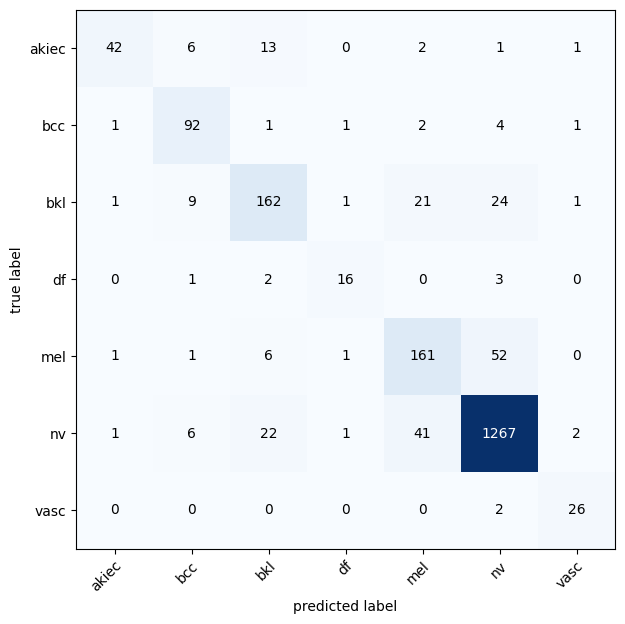

In [113]:
# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_test,
                         target=y_true_test)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);